In [2]:
# %pip install -q ccxt pandas matplotlib pyarrow
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from market_microstructure_toolkit.exchange import make_exchange
from market_microstructure_toolkit.record import record_snapshots

plt.rcParams["figure.dpi"] = 160

In [3]:
EXCHANGE = "bybit"
SYMBOL = "ETH/USDT:USDT"
HZ = 2.0
DEPTH = 100
SECS = 60
Path("data").mkdir(exist_ok=True)
ex = make_exchange(EXCHANGE, default_type="swap", timeout=10000)
out = Path("data/ETH_bybit_L2_60s.parquet")
record_snapshots(
    ex,
    SYMBOL,
    depth=DEPTH,
    seconds=SECS,
    hz=HZ,
    out_path=str(out),
    book_level="L2",
    out_format="parquet",
)
df = pd.read_parquet(out)  # or csv
df["t"] = pd.to_datetime(df["ts_ms"], unit="ms", utc=True)
df.head()

,ts_ms,iso,exchange_id,symbol,book_level,raw_nonce,best_bid,best_ask,bid1_price,bid1_size,...,ask96_size,ask97_price,ask97_size,ask98_price,ask98_size,ask99_price,ask99_size,ask100_price,ask100_size,t
0,1755509347775,2025-08-18T09:29:07.775000+00:00,bybit,ETH/USDT:USDT,L2,,4237.02,4237.03,4237.02,2.08,...,2.33,4238.59,4.55,4238.60,2.14,4238.61,0.14,4238.62,5.85,2025-08-18 09:29:07.775000+00:00
1,1755509347876,2025-08-18T09:29:07.876000+00:00,bybit,ETH/USDT:USDT,L2,,4236.30,4236.31,4236.30,25.41,...,0.02,4237.93,16.15,4237.94,0.13,4237.95,4.67,4237.96,10.05,2025-08-18 09:29:07.876000+00:00
2,1755509348074,2025-08-18T09:29:08.074000+00:00,bybit,ETH/USDT:USDT,L2,,4236.30,4236.31,4236.30,25.41,...,10.53,4237.95,9.53,4237.96,12.93,4237.97,0.08,4237.98,1.28,2025-08-18 09:29:08.074000+00:00
3,1755509348174,2025-08-18T09:29:08.174000+00:00,bybit,ETH/USDT:USDT,L2,,4236.39,4236.89,4236.39,0.18,...,10.11,4238.22,14.35,4238.23,2.31,4238.24,6.85,4238.25,0.30,2025-08-18 09:29:08.174000+00:00
4,1755509348475,2025-08-18T09:29:08.475000+00:00,bybit,ETH/USDT:USDT,L2,,4236.79,4236.80,4236.79,14.30,...,19.45,4238.25,0.02,4238.26,5.68,4238.27,0.18,4238.28,0.20,2025-08-18 09:29:08.475000+00:00


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


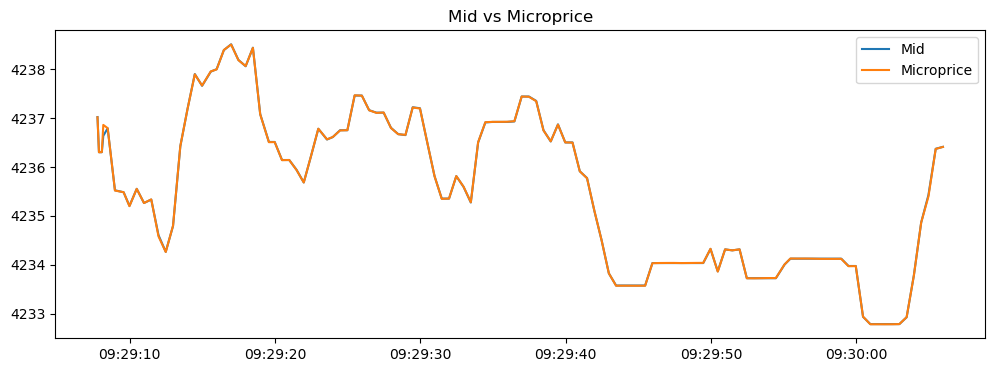

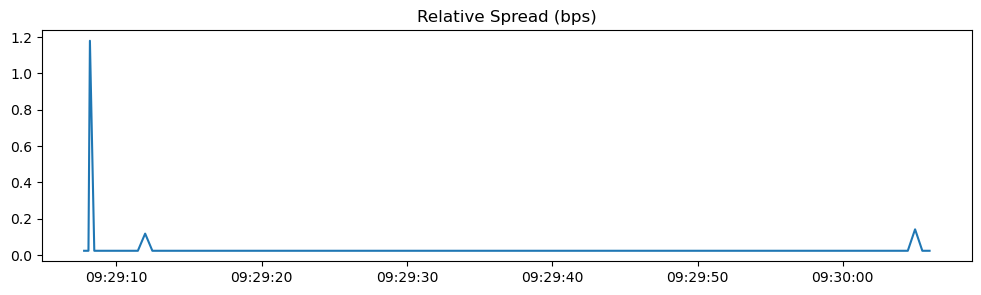

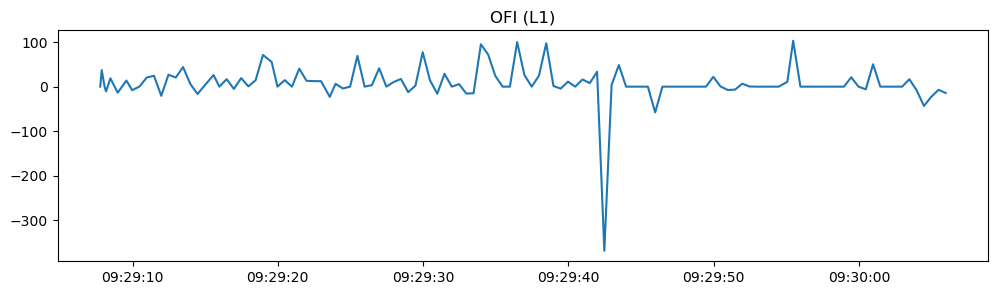

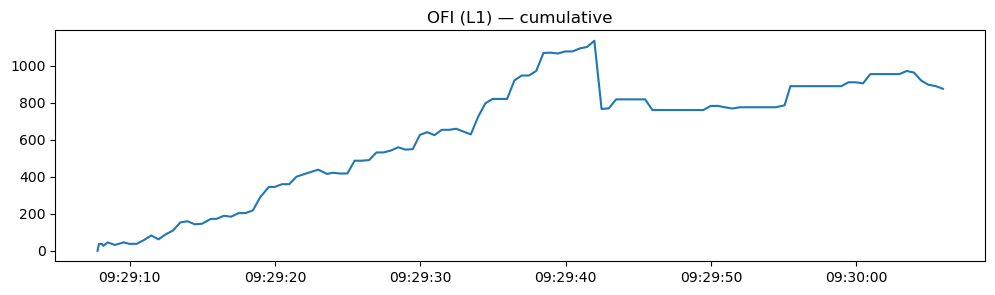

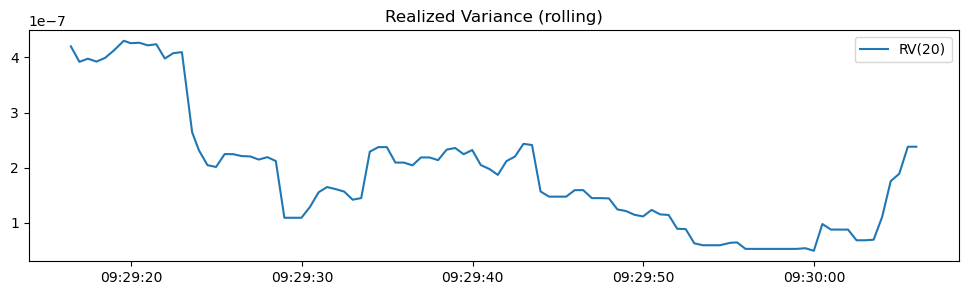

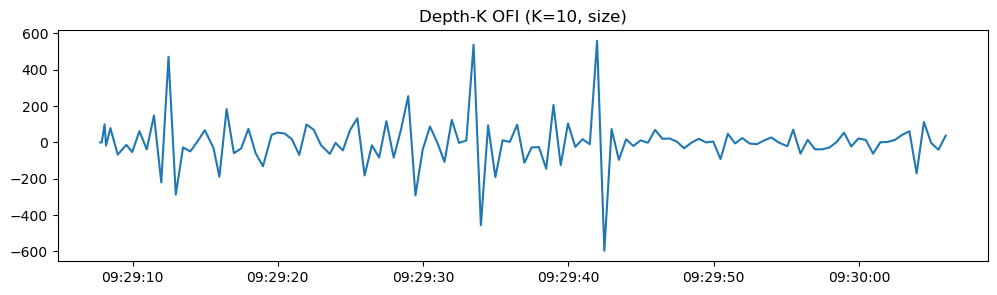

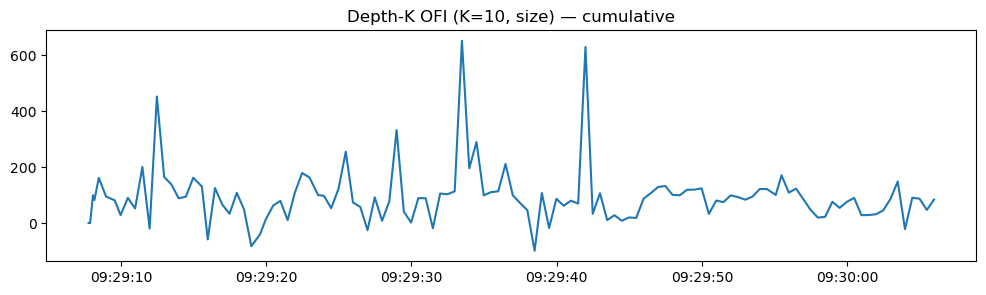

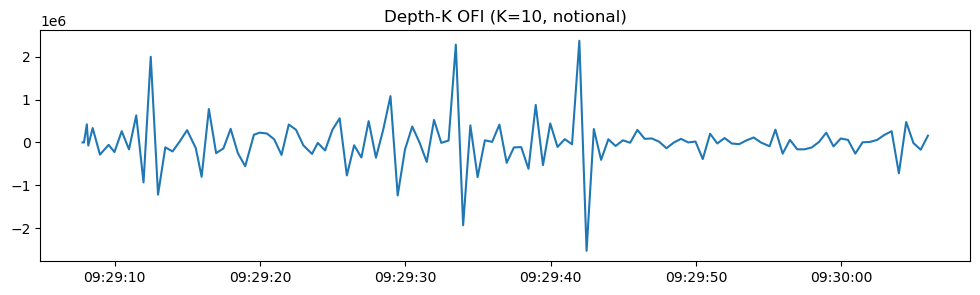

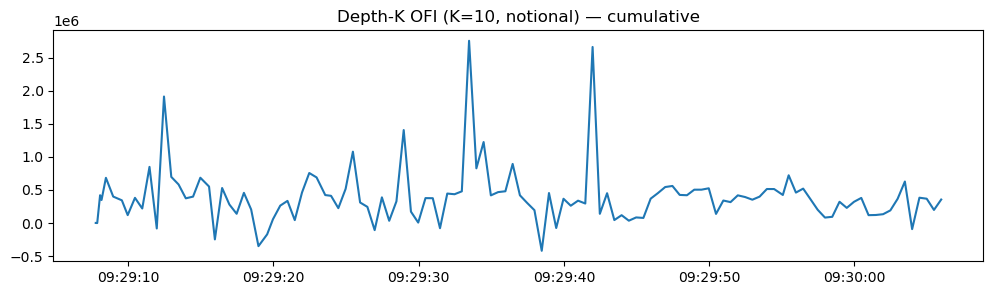

In [1]:
from pathlib import Path
from market_microstructure_toolkit.plot_cli import (
    _load_rows,
    _to_dataframe,
    _compute_metrics,
    _plot,
)

path = Path("data/ETH_bybit_L2_60s.parquet")
df = _to_dataframe(_load_rows(path))
df = _compute_metrics(df, depth=100)
_plot(df, out=path)  # saves PNGs if out is provided